<a href="https://colab.research.google.com/github/ZELTROX1/Machine_learning/blob/main/Employee_Burnout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [4]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [6]:
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [7]:
train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

Text(0.5, 1.0, 'Resource Allocation')

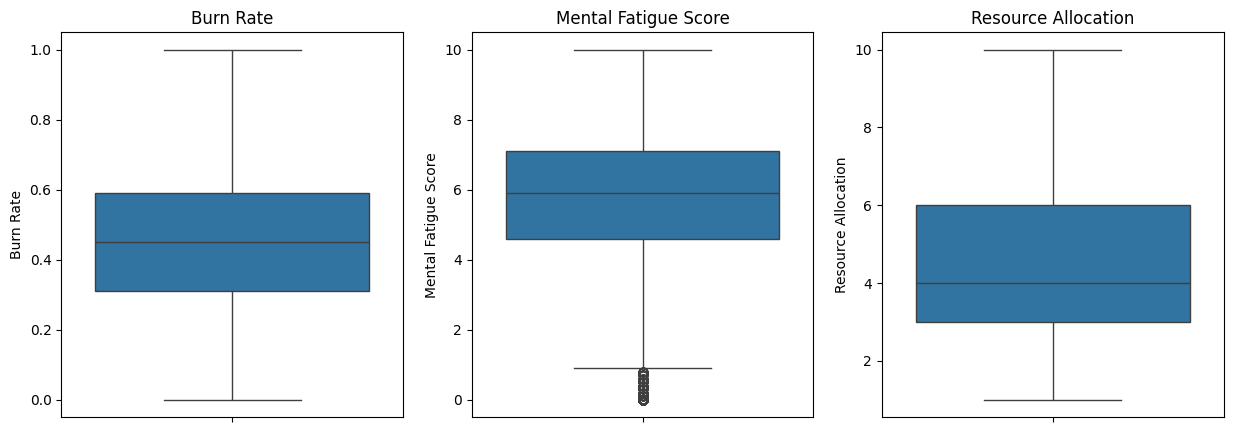

In [8]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(train['Burn Rate'],ax=ax[0])
ax[0].set_title('Burn Rate')
sns.boxplot(train['Mental Fatigue Score'],ax=ax[1])
ax[1].set_title('Mental Fatigue Score')
sns.boxplot(train['Resource Allocation'],ax=ax[2])
ax[2].set_title('Resource Allocation')

Text(0.5, 1.0, 'Resource Allocation')

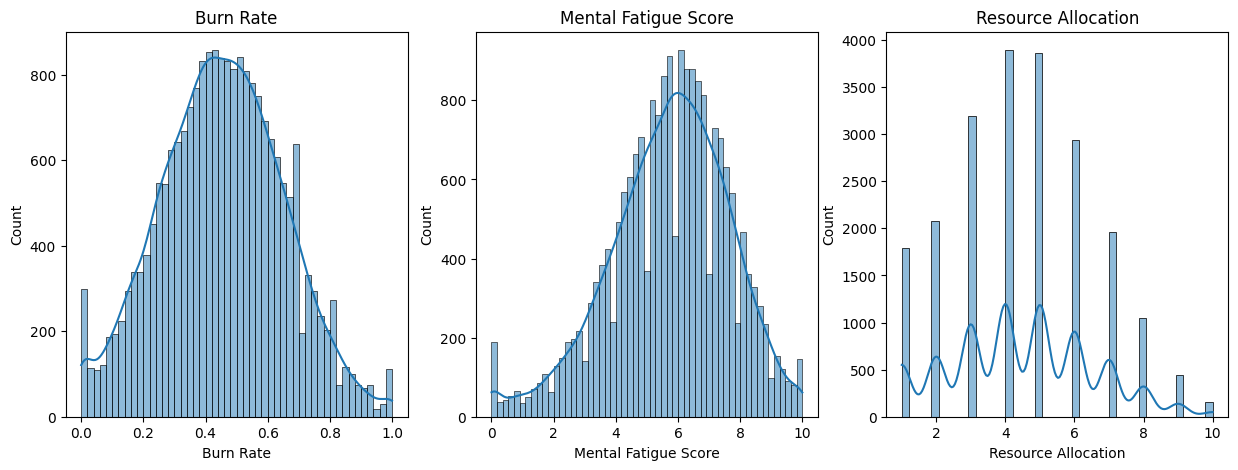

In [9]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(train['Burn Rate'], kde=True,ax=ax[0])
ax[0].set_title('Burn Rate')
sns.histplot(train['Mental Fatigue Score'], kde=True,ax=ax[1])
ax[1].set_title('Mental Fatigue Score')
sns.histplot(train['Resource Allocation'], kde=True,ax=ax[2])
ax[2].set_title('Resource Allocation')

In [10]:
imputer=SimpleImputer(strategy='median')
train['Burn Rate']=imputer.fit_transform(train[['Burn Rate']])
train['Mental Fatigue Score']=imputer.fit_transform(train[['Mental Fatigue Score']])
train['Resource Allocation']=imputer.fit_transform(train[['Resource Allocation']])

In [11]:
train.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [12]:
label_encoding=LabelEncoder()
train['Employee ID']=label_encoding.fit_transform(train['Employee ID'])
one_hot_encoding=OneHotEncoder(sparse=False)
train['Gender']=one_hot_encoding.fit_transform(train[['Gender']])
train['Company Type']=one_hot_encoding.fit_transform(train[['Company Type']])
train['WFH Setup Available']=one_hot_encoding.fit_transform(train[['WFH Setup Available']])
train['Designation']=one_hot_encoding.fit_transform(train[['Designation']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [13]:
import datetime as dt
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])

In [14]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,7722,2008-09-30,1.0,0.0,1.0,0.0,3.0,3.8,0.16
1,21062,2008-11-30,0.0,0.0,0.0,0.0,2.0,5.0,0.36
2,2381,2008-03-10,1.0,1.0,0.0,0.0,4.0,5.8,0.49
3,10790,2008-11-03,0.0,0.0,0.0,0.0,1.0,2.6,0.20
4,6810,2008-07-24,1.0,0.0,1.0,0.0,7.0,6.9,0.52


In [15]:
scaler=StandardScaler()
train['Mental Fatigue Score']=scaler.fit_transform(train[['Mental Fatigue Score']])
train['Resource Allocation']=scaler.fit_transform(train[['Resource Allocation']])

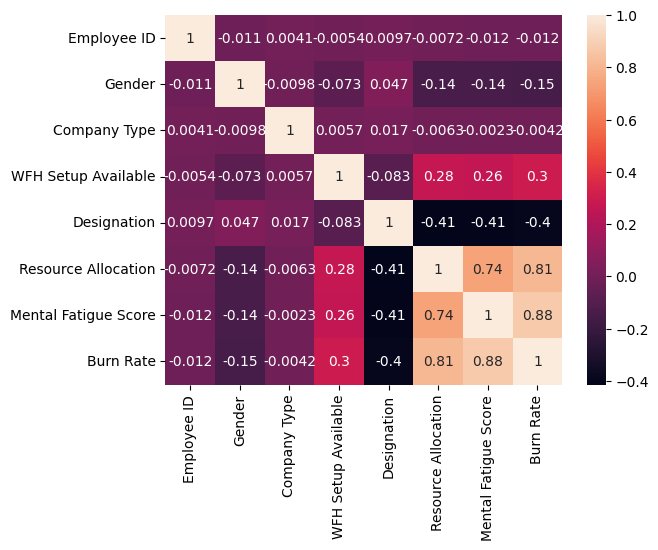

In [16]:
corr_data=train.drop(['Date of Joining'],axis=1)
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [17]:
y=train['Burn Rate']
X=train.drop(['Burn Rate','Date of Joining'],axis=1)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
rf_regressor=RandomForestRegressor(n_estimators=100,random_state=0)
df_regressor=DecisionTreeRegressor(random_state=0)
gbr=GradientBoostingRegressor(random_state=0)
voting_regressor=VotingRegressor([('rf',rf_regressor),('dt',df_regressor),('gbr',gbr)])

In [21]:
voting_regressor.fit(X_train,y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=0)),
                            ('dt', DecisionTreeRegressor(random_state=0)),
                            ('gbr', GradientBoostingRegressor(random_state=0))])

In [22]:
y_pred=voting_regressor.predict(X_test)

In [23]:
mean_squared_error(y_test,y_pred)

0.006019377328133255

In [24]:
r2_score(y_test,y_pred)

0.8327703908822923

# Cross-Validation using MSE

In [25]:
cv_scores = cross_val_score(voting_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-np.mean(cv_scores)}')

Cross-Validation MSE: 0.006315316959204837


# Using GridSearchCV
to find the optimal parameters for RandomForestRegression

In [28]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best parameters for RandomForestRegressor: {grid_search.best_params_}')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [38]:
best_rf = grid_search.best_estimator_
voting_regressor2 = VotingRegressor([('rf', best_rf), ('gbr', gbr)])
voting_regressor2.fit(X_train, y_train)


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   n_estimators=200,
                                                   random_state=0)),
                            ('gbr', GradientBoostingRegressor(random_state=0))])

In [39]:
y_pred2 = voting_regressor2.predict(X_test)

In [40]:
mean_squared_error(y_test, y_pred2)

0.0051549494086436335

In [41]:
r2_score(y_test, y_pred2)

0.8567858222477677

# RandomForestRegressior with optimal parameters training and testing

In [43]:
rf_regressor=RandomForestRegressor(random_state=42,max_depth= 10,min_samples_leaf=2,min_samples_split=10,n_estimators=1000)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1000, random_state=42)

In [45]:
y_pred3=rf_regressor.predict(X_test)

In [46]:
mean_squared_error(y_test,y_pred3)

0.005161075561962955

In [47]:
r2_score(y_test,y_pred3)

0.8566156262010443